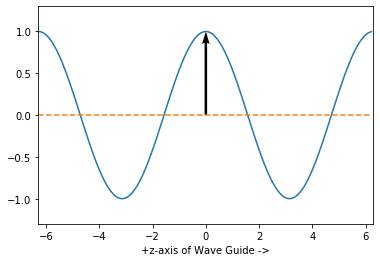

In [68]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi
plt.quiver([0], [0], [0], [1], angles='xy', scale_units='xy', scale=1)
plt.xlim(-2*pi, 2*pi)
plt.ylim(-1.3, 1.3)

x = np.arange(-2*pi, 2*pi, 0.1)
y = np.zeros(126)
#plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'])
plt.plot(x,np.cos(x))
plt.plot(x,y, linestyle='dashed')
plt.xlabel('+z-axis of Wave Guide ->')
plt.show()

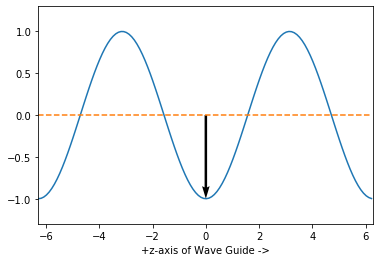

In [7]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi
plt.quiver([0], [0], [0], [-1], angles='xy', scale_units='xy', scale=1)
plt.xlim(-2*pi, 2*pi)
plt.ylim(-1.3, 1.3)

x = np.arange(-2*pi, 2*pi, 0.1)
y = np.zeros(126)
#plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'])
plt.plot(x,np.cos(x-pi))
plt.plot(x,y, linestyle='dashed')
plt.xlabel('+z-axis of Wave Guide ->')
plt.show()

In [12]:
## URL execution for Vaunix system: 

# Instructions: 

# B. Start up the Flask server for vaunix control:
#   1. <ssh pi@10.66.192.43>     (PW = Vaunix)
#   2. <sudo su>
#   3. <export FLASK_APP=vaunixFlask.py>
#   4. <flask run -h 10.66.192.43>
#   5. open web browser and enter URL:
#      a. 10.66.192.43:5000/
#      b. 10.66.192.43:5000/setPower/-30.0
#      c. 10.66.192.43:5000/setFreq/19.5
#      d. 10.66.192.43:5000/setRF_On


# Should write a script that also sets up the enviornment. That would be nice for everyone to use. 
import webbrowser

def DialThisUp(freq, power):

    webbrowser.open('http://10.66.192.43:5000/setPower/{}'.format(power), autoraise = False)
    webbrowser.open('http://10.66.192.43:5000/setFreq/{}'.format(freq), autoraise = False)
    webbrowser.open('http://10.66.192.43:5000/setRF_On', autoraise = False)

In [14]:
DialThisUp(18.305,-15)

In [12]:
import numpy as np

In [2]:
# Modeling the Noise of the Terminator + WG system

T_e_WG = lambda T_WG, G_WG: T_WG*(G_WG**-1 -1)

T_e_Tot = lambda T_Term, T_WG, G_WG: T_Term + T_e_WG(T_WG,G_WG)/G_WG # Note: Can't have a function in the list of variables. 

N_Tot = lambda T_Term, T_WG, G_WG: 10*np.log10((k*B*G_WG*T_e_Tot(T_Term, T_WG, G_WG))*10**3)

In [3]:
k = 1.380649* 10**-23  # (J/K)
B = 170 *10**3         # (Hz)
G_WG_dB = -2
G_WG = 10**(G_WG_dB/10)
T_Term = 28
T_WG = 100 

In [4]:
T_e_WG(T_WG,G_WG) # Why is a 3dB loss special here? 

58.489319246111336

In [5]:
T_e_Tot(T_Term, T_WG, G_WG) # This function is failing for some reason. 


120.69932390484664

In [6]:
# Why is the above not working?
print(28 + 58.49/(10**(-2/10)))

120.70040282705052


In [13]:
N_Tot(G_WG,T_e_Tot) # Ok so this plus the rest of the gain should give me B51, correct? Lets see

G_REST_dB = 80 + G_WG_dB

N_Tot_Final = N_Tot(G_WG,T_e_Tot) + G_REST_dB
print(N_Tot_Final)
# HMMMM This is not agreeing. But it's more complicated than my model. 

-49.4776295853228


In [21]:
f = lambda x: x + 10
g = lambda f: f(y) + 1

In [22]:
g(2)

NameError: name 'y' is not defined

In [2]:
# Modeling the Equivalent Noise Temp of a Cascaded System
import numpy as np
# Functions: 
dBToLinear = lambda x: 10**(x/10)

# T_e_1 = lambda T_1, G_1: T_1*(dBToLinear(G_1)**-1 -1) # eq. 10.15 

T_e_cas = lambda T_Temp, T_1, T_e_2, T_e_3, G_1, G_2: T_Temp + T_1*(dBToLinear(G_1)**-1 -1) + T_e_2/(dBToLinear(G_1)) + T_e_3/(dBToLinear(G_1 + G_2)) # eq. 10.22


In [4]:
k = 1.380649* 10**-23  # (J/K)
B = 170 *10**3         # (Hz)

# Specifically: 
T_1 = 100
G_1 = -4
G_2 = 31.5 # (dB) Note: I just assumed half the total gain came from the first LNA. 

T_e_2 = 7
T_e_3 = 9

T_term = 28

T_e_tot = T_e_cas(T_1, T_e_2, T_e_3, G_1, G_2) + T_term
NoiseDensity_tot = np.log10(k*T_e_tot)

print(T_e_tot)

# T_e_Tot = lambda T_Term, T_WG, G_WG: T_Term + T_e_WG(T_WG,G_WG)/G_WG # Note: Can't have a function in the list of variables. 

# N_Tot = lambda T_Term, T_WG, G_WG: 10*np.log10((k*B*G_WG*T_e_Tot(T_Term, T_WG, G_WG))*10**3)

196.78785268621544


In [9]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets120

NoiseTemp = interactive(T_e_cas, T_Temp = (13,43),T_1=(50,150), T_e_2 = (6,8), T_e_3 = (8,10),G_1=(-5,0), G_2=(31,33))
display(NoiseTemp)

interactive(children=(IntSlider(value=28, description='T_Temp', max=43, min=13), IntSlider(value=100, descript…

In [11]:
print(NoiseTemp.result)

97.59257159333913


In [8]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

f = lambda x,y,z: x+y+z


In [9]:
interact(f, x=(0,4),y = (2,3), z = (1,3))

interactive(children=(IntSlider(value=2, description='x', max=4), IntSlider(value=2, description='y', max=3, m…

<function __main__.<lambda>(x, y, z)>

In [6]:
# Note: Had an issue installing this becuase of the node package, I think. 
# Ultimately, this got me what I wanted: 
# https://stackoverflow.com/questions/61210272/jupyterlab-plotly-build-npm-extensions-failed-to-install-on-linux
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [7]:
interact(f, x=(0,4),y = (2,3), z = (1,3))

NameError: name 'f' is not defined

In [ ]:
# Random:


In [5]:
fft_window = 27.31e-6
Vaunix_freq = 18.455e9

print(Vaunix_freq*fft_window)
print(504000/fft_window)
18.4548

504006.05000000005
18454778469.425117


In [11]:
# Explaining the Sidebands: 
fft_window = 27.31e-6
Vaunix_freq = 18.65e9

print(Vaunix_freq*fft_window)
print(4*1e-6/fft_window)

# Why the 4? Could be a factor of 2 and 2 or 8 and .5? 

# So along these lines: 

fft_window = 27.31e-6
Vaunix_freq = 18.30e9

print(Vaunix_freq*fft_window)
print(4*1e-6/fft_window)

509331.5
0.14646649578908824
499773.0
0.14646649578908824


In [ ]:
# Plots for Rey: 

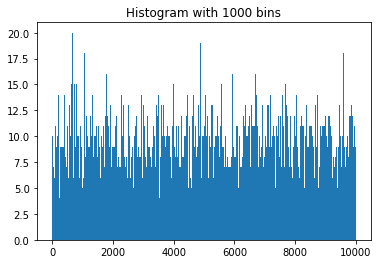

Relative variation: 0.2670954885429554


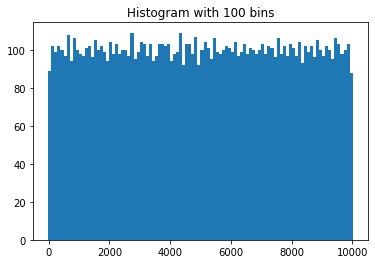

Relative variation: 0.0394715087119811


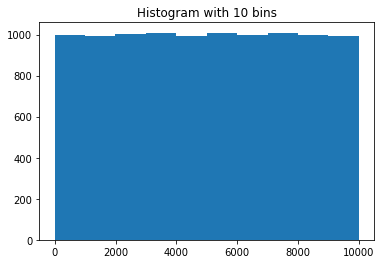

Relative variation: 0.005458937625582473


In [72]:
import matplotlib.pyplot as plt
import numpy as np

# sloppy way to simulate time stamp data from a radioactive source (constant rate)
mu, sigma = 0, 10 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
s = s+np.arange(0,10000)


x,y,_ = plt.hist(s, bins=1000)  # arguments are passed to np.histogram
plt.title("Histogram with 1000 bins")
# Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()
print('Relative variation:',x.std()/x.mean())

x,y,_ = plt.hist(s, bins=100)  # arguments are passed to np.histogram
plt.title("Histogram with 100 bins")
# Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()
print('Relative variation:',x.std()/x.mean())

x,y, _ = plt.hist(s, bins=10)  # arguments are passed to np.histogram
plt.title("Histogram with 10 bins")
# Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()
print('Relative variation:',x.std()/x.mean())

In [58]:
import math
import random

def nextTime(rateParameter):
    return -math.log(1.0 - random.random()) / rateParameter

random.expovariate(1)

1.4858630416016672

In [11]:
# Investigating the np array method std().
# How to relate std() to the 
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 0, 10 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
s.std()

10.031880408373738

In [30]:
# Work for HW3 #2 (Group Theory 507): (William (Drew) Byron)
import numpy as np

constantarray =       np.array([[1,2,3,1,2,3],
                               [1,2,-3,1,2,-3],
                               [1,2,3,-1,-2,-3],
                               [1,2,-3,-1,-2,3],
                               [2,-2,0,2,-2,0],
                               [2,-2,0,-2,2,0]]) 
r = np.zeros([12,6,6])
r[0] = np.tile(np.array([1,1,-1,-1,-1,1]),(6,1)) # Here are the reducible representations
r[1] = np.tile(np.array([1,1,1,-1,-1,-1]),(6,1))
r[2] = np.tile(np.array([1,1,-1,1,1,-1 ]),(6,1)) 
r[3] = np.tile(np.array([1,1,1,1,1,1]),(6,1))
r[4] = np.tile(np.array([2,-1,0,-2,1,0]),(6,1)) 
r[5] = np.tile(np.array([2,-1,0,2,-1,0]),(6,1))
r[6] = np.tile(np.array([2,-1,0,-2,1,0]),(6,1)) 
r[7] = np.tile(np.array([2,-1,0,-2,1,0]),(6,1))
r[8] = np.tile(np.array([2,-1,0,2,-1,0]),(6,1)) 
r[9] = np.tile(np.array([2,-1,0,2,-1,0]),(6,1))
r[10] = np.tile(np.array([4,1,0,-4,-1,0]),(6,1)) 
r[11] = np.tile(np.array([4,1,0,4,1,0]),(6,1))

# reparray_1 = np.tile(r,(6,1))
print(np.sum(r_1*constantarray, axis = 1 ))

for i in range(12):
    
    print("r_{} coefficients:".format(i+1),np.sum(r[i]*constantarray, axis = 1 )/12)

[ 0  0  0 12  0  0]
r_1 coefficients: [0. 0. 0. 1. 0. 0.]
r_2 coefficients: [0. 0. 1. 0. 0. 0.]
r_3 coefficients: [0. 1. 0. 0. 0. 0.]
r_4 coefficients: [1. 0. 0. 0. 0. 0.]
r_5 coefficients: [0. 0. 0. 0. 0. 1.]
r_6 coefficients: [0. 0. 0. 0. 1. 0.]
r_7 coefficients: [0. 0. 0. 0. 0. 1.]
r_8 coefficients: [0. 0. 0. 0. 0. 1.]
r_9 coefficients: [0. 0. 0. 0. 1. 0.]
r_10 coefficients: [0. 0. 0. 0. 1. 0.]
r_11 coefficients: [0. 0. 1. 1. 0. 1.]
r_12 coefficients: [1. 1. 0. 0. 1. 0.]
